In [1]:
import pandas as pd
import pdb
import numpy as numpy
from io import StringIO
from scipy.spatial import distance

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Code that takes an SWC file with synapses annotated along the skeleton, and iterates through each synapse to measure distance from soma

swc_fn = "Z:/fred/pvBb_bla1/swc_synAdded/n5_synAdded.swc"
swcData = numpy.genfromtxt(swc_fn,comments = "#", delimiter = ' ', dtype = 'i8')

idxExcitatory = numpy.where(swcData[:,7] == 1)
idxInhibitory = numpy.where(swcData[:,7] == 2)
scaleXY = 0.05; #in microns
scaleZ = 0.175;

def getDistFromSoma(swcFile, synIdx):
    totDist =0
    while swcFile[synIdx,6]>0:
        nextIdx = swcFile[synIdx,6] - 1;
        totDist = totDist + distance.euclidean([swcFile[nextIdx,2]*scaleXY,swcFile[nextIdx,3]*scaleXY,swcFile[nextIdx,4]*scaleZ],[swcFile[synIdx,2]*scaleXY,swcFile[synIdx,3]*scaleXY,swcFile[synIdx,4]*scaleZ])
        synIdx = nextIdx;
    return totDist

inh_histDist = numpy.zeros((len(idxInhibitory[0]),1))
for i,idx in enumerate(idxInhibitory[0]):
    inh_histDist[i] = getDistFromSoma(swcData,idx)

exc_histDist = numpy.zeros((len(idxExcitatory[0]),1))
for i,idx in enumerate(idxExcitatory[0]):
    exc_histDist[i] = getDistFromSoma(swcData,idx)
    
#Code that splits separates the somas and dendrite synapse counts
idx = numpy.where(inh_histDist[:,0] == 0)
inh_Soma = idx[0].size
inh_histDist = numpy.delete(inh_histDist,idx)

idx = numpy.where(exc_histDist[:,0] == 0)
exc_Soma = idx[0].size
exc_histDist = numpy.delete(exc_histDist,idx)

print(inh_Soma)
print(exc_Soma)

44
21


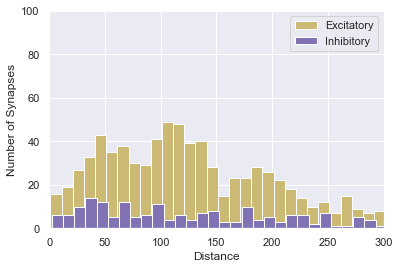

In [6]:
#Code to take histData and plot it


sns.set_color_codes('dark')
sns.set(font = 'Arial')

binSize = 10; #microns
myBins_ex =numpy.arange(min(exc_histDist),max(exc_histDist) + binSize,binSize)
myBins_in =numpy.arange(min(inh_histDist),max(inh_histDist) + binSize,binSize)

sns.distplot(exc_histDist, kde = False , bins = myBins_ex, hist_kws={"alpha": 1, "color": 'y'}, label = 'Excitatory')
sns.distplot(inh_histDist, kde = False , bins = myBins_in, hist_kws={"alpha": 1, "color": 'm'}, label = 'Inhibitory')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Number of Synapses')
plt.xlim((0,300))
plt.ylim((0,100))
plt.show()

#plt.savefig(out_name, dpi = 300)


(-20, 300)

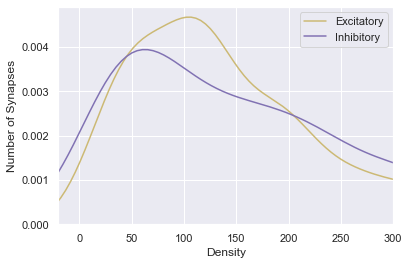

In [7]:
#Code to take histData and plot it

sns.set_color_codes('dark')
sns.set(font = 'Arial')
#out_name = "//172.16.0.50/sonic/fred/pvBb_bla1/swc_synAdded/graph/n3_synAdded.svg"

binSize = 10; #microns
myBins_ex =numpy.arange(min(exc_histDist),max(exc_histDist) + binSize,binSize)
myBins_in =numpy.arange(min(inh_histDist),max(inh_histDist) + binSize,binSize)

sns.distplot(exc_histDist, kde = True,  hist = False , bins = myBins_ex, color = 'y', label = 'Excitatory')
sns.distplot(inh_histDist, kde = True , hist = False, bins = myBins_in, color = 'm',  label = 'Inhibitory')
plt.legend()
plt.xlabel('Density')
plt.ylabel('Number of Synapses')
plt.xlim((-20,300))

#out_name = "//172.16.0.50/sonic/fred/pvBb_bla1/swc_synAdded/graph/n3_synAdded.svg"

#plt.savefig(out_name, dpi = 300)
